In [90]:
import numpy as np
import pandas as pd

In [91]:
df = pd.read_csv('spam.csv', encoding= 'latin-1')

In [92]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4485,ham,have * good weekend.,NaN,NaN,NaN
1935,ham,Did either of you have any idea's? Do you know...,NaN,NaN,NaN
3196,ham,So its to be poking man everyday that they tea...,NaN,NaN,NaN
5362,ham,I'm in inside office..still filling forms.don ...,NaN,NaN,NaN
3050,ham,Awesome question with a cute answer: Someone a...,NaN,NaN,NaN


In [93]:
df.shape

(5572, 5)

In [94]:
## Steps:
# 1. Data Cleaning
# 2. EDA - Exploitary Data Analysis 
# 3. Text Preprocessing
# 4. Model Building
# 5. Model Evaluation
# 6. Improvements 
# 7. Website 
# 8. Deployment 


1. Data Cleaning

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [96]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
2462,ham,"Rose needs water, season needs change, poet ne..."
746,ham,"I promise to take good care of you, princess. ..."
663,ham,Leave it de:-). Start Prepare for next:-)..
1651,ham,I wan but too early lei... Me outside now wun ...
1225,ham,"sir, you will receive the account no another 1..."


In [97]:
# renaming the cols 
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
3894,ham,Yes. Last practice
306,ham,Jos ask if u wana meet up?
1519,ham,Check wid corect speling i.e. Sarcasm
435,ham,The message sent is askin for &lt;#&gt; dolla...
4080,ham,Hurry home. Soup is DONE!


In [98]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [99]:
df['target'] = encoder.fit_transform(df['target'])

In [100]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
# missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [102]:
# check for duplicate values
df.duplicated().sum()

402

In [103]:
df.shape

(5572, 2)

In [104]:
# remove duplicate values 
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [105]:
df.shape

(5170, 2)

2. EDA - Exploratory Data Analysis

In [106]:
df['target'].value_counts()

0    4516
1     654
Name: target, dtype: int64

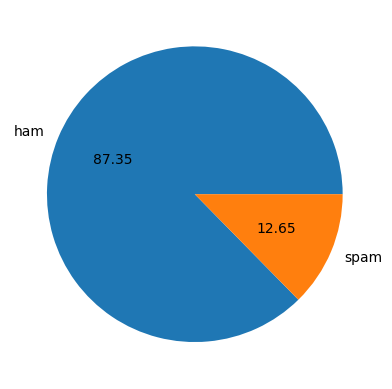

In [107]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [108]:
# !pip install nltk

In [109]:
import nltk 

In [110]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devbh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
# number of characters
df['num_chars'] = df['text'].apply(len)

In [112]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [113]:
# number of words 
# df['text'].apply(lambda x: nltk.word_tokenize(x)) --> gives the list of all the words 
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))  # gives length of the list 

In [114]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [115]:
# number of sentences 
df['num_sents'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [116]:
df.head()

,target,text,num_chars,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [117]:
df[['num_chars', 'num_words', 'num_sents']].describe()

,num_chars,num_words,num_sents
count,5170.000000,5170.000000,5170.000000
mean,78.984913,18.457447,1.965764
std,58.232815,13.323999,1.448473
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [118]:
# ham messages
df[df['target'] == 0][['num_chars', 'num_words', 'num_sents']].describe()

,num_chars,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [119]:
# sham messages
df[df['target'] == 1][['num_chars', 'num_words', 'num_sents']].describe()

,num_chars,num_words,num_sents
count,654.000000,654.000000,654.000000
mean,137.856269,27.666667,2.970948
std,30.127968,7.003099,1.487286
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [120]:
import seaborn as sns 

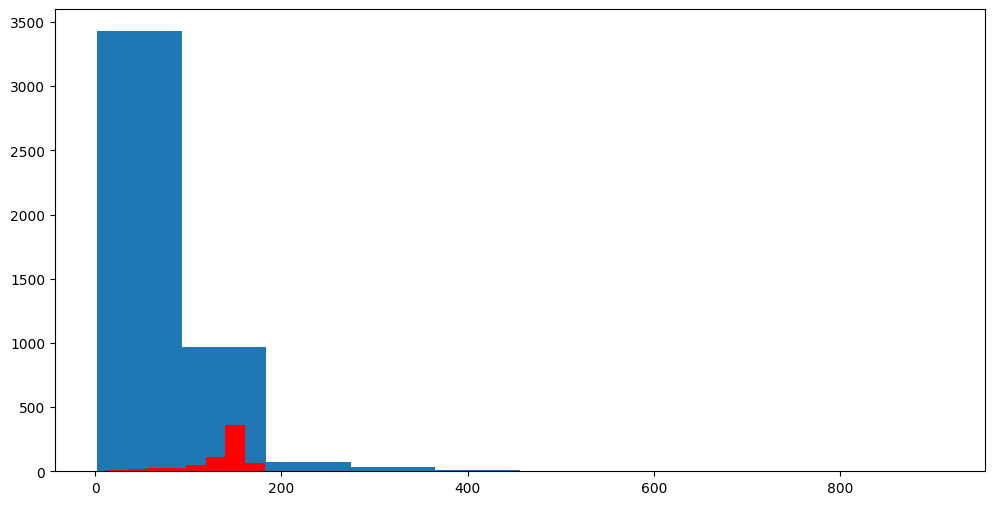

In [121]:
plt.figure(figsize= (12,6))
plt.hist(df[df['target'] == 0]['num_chars'])
plt.hist(df[df['target'] == 1]['num_chars'], color='red')
plt.show()

C:\Users\devbh\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


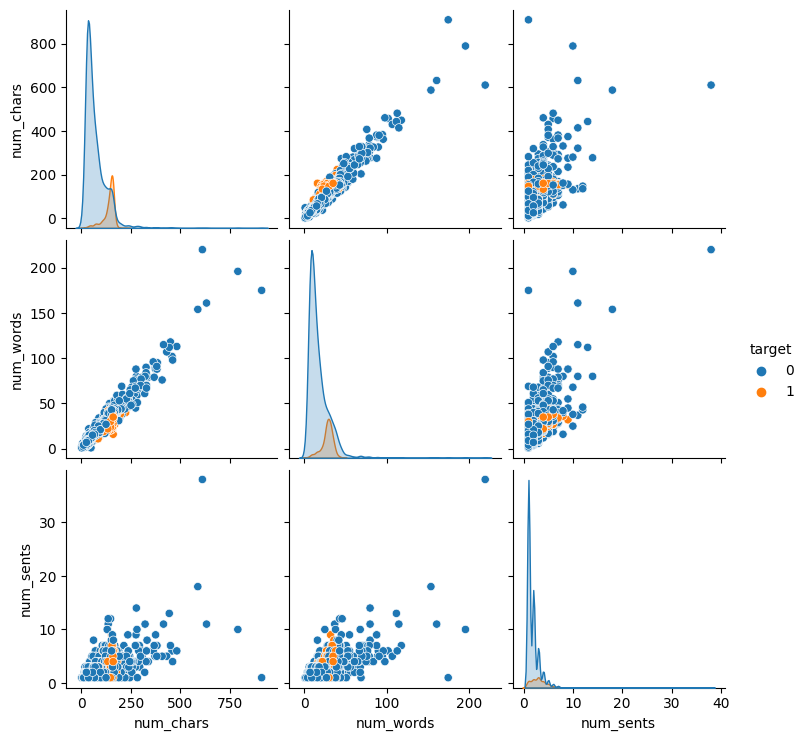

In [122]:
sns.pairplot(df, hue='target')

In [123]:
df.corr()   # --> tells the correlation between features/columns

C:\Users\devbh\AppData\Local\Temp\ipykernel_29120\2095721905.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()   # --> tells the correlation between features/columns


,target,num_chars,num_words,num_sents
target,1.000000,0.384760,0.263052,0.264113
num_chars,0.384760,1.000000,0.965763,0.624171
num_words,0.263052,0.965763,1.000000,0.679999
num_sents,0.264113,0.624171,0.679999,1.000000


C:\Users\devbh\AppData\Local\Temp\ipykernel_29120\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

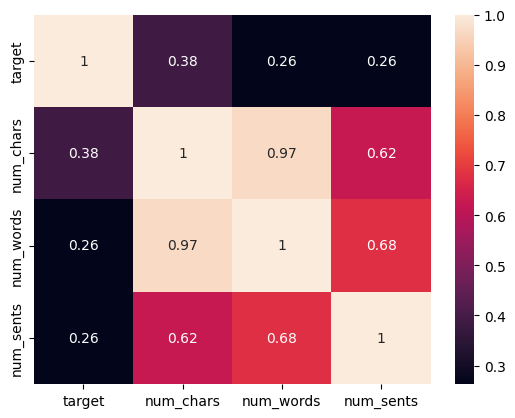

In [124]:
sns.heatmap(df.corr(), annot=True)

3. Data Preprocessing 
* Lower case 
* Tokenization
* Removing special characters 
* Removing stop words and punctuation
* Stemming 

In [125]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() 
#ps.stem('loving')

In [126]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # text = y[:]
    # y.clear()

    # for i in text:
    #     y.append(ps.stem(i))

    return ' '.join(y)

In [127]:
transform_text('Hi. How Are yOu doing loving dancing mASter Dev Bhit? 20% = 20/100')

'hi loving dancing master dev bhit 20'

In [128]:
print(df['text'][10])
print(transform_text(df['text'][10]))

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
gon na home soon want talk stuff anymore tonight k cried enough today


In [129]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_chars,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [130]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=8, background_color='white')

In [131]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

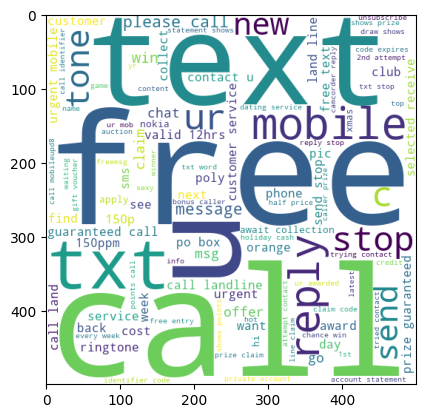

In [132]:
plt.imshow(spam_wc)

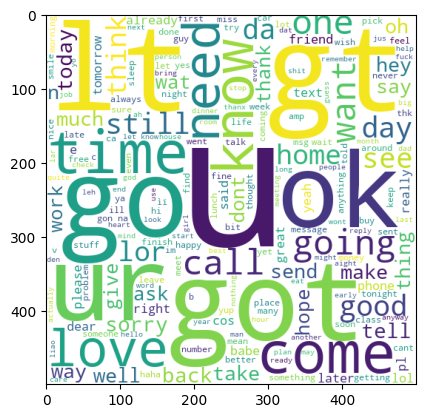

In [133]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [134]:
spam_list = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_list.append(word)

In [135]:
len(spam_list)

9956

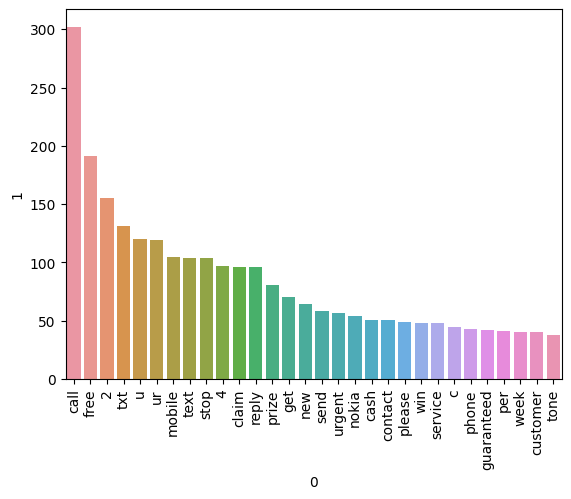

In [136]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_list).most_common(30))[0], y=pd.DataFrame(Counter(spam_list).most_common(30))[1])
plt.xticks(rotation= 'vertical')
plt.show()

4. Model Building

In [137]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) 
#keeping max_features=3000 increases the accuracy of mnb model, decreasing of other models slightly 

In [138]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [139]:
X.shape

(5170, 3000)

In [140]:
y = df['target'].values

In [141]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=2)
# instead of test, written cv, baki sab same 

In [144]:
print(X_train.shape, X_cv.shape)

(4136, 3000) (1034, 3000)


In [145]:
#print(X_.shape, y_.shape)

In [146]:
#X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=2)

In [147]:
#print(X_cv.shape, X_test.shape)

In [148]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [149]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [150]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_cv)
print(accuracy_score(y_cv, y_pred1))
print(confusion_matrix(y_cv, y_pred1))
print(precision_score(y_cv, y_pred1))

0.8810444874274661
[[797  99]
 [ 24 114]]
0.5352112676056338


In [151]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_cv)
print(accuracy_score(y_cv, y_pred2))
print(confusion_matrix(y_cv, y_pred2))
print(precision_score(y_cv, y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [152]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_cv)
print(accuracy_score(y_cv, y_pred3))
print(confusion_matrix(y_cv, y_pred3))
print(precision_score(y_cv, y_pred3))

0.9825918762088974
[[896   0]
 [ 18 120]]
1.0


In [153]:
# tfidf tokenizer with multinomial Naive Bayes selected 
# as it gives the highest precision ie of 1 
# ie it coreectly predicts all the spam messages, there is no falsepositive 

Trying out different models and comparing them

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [155]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
knc = KNeighborsClassifier()
xgb = XGBClassifier()


In [156]:
models = {
    'LogisticRegression' : lrc,
    'SVC' : svc,
    'MultinomialNB' : mnb,
    'DecisionTreeClassifier' : dtc,
    'RandomForestClassifier': rfc,
    'AdaBoostClassifier' : abc,
    'BaggingClassifier' : bc,
    'ExtraTreesClassifier' : etc,
    'GradientBoostingClassifier' : gbc,
    'KNeighborsClassifier' : knc,
    'XGBClassifier' : xgb
}

In [157]:
def train_classifier(model, X_train, y_train, X_cv, y_cv):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_cv)
    accuracy = accuracy_score(y_cv, y_pred)
    precision = precision_score(y_cv, y_pred)
    return accuracy, precision

In [158]:
train_classifier(mnb, X_train, y_train, X_cv, y_cv)

(0.9748549323017408, 1.0)

In [159]:
accuracy_scores = []
precision_scores = []
for name, model in models.items():
    current_accuracy, current_prcision = train_classifier(model, X_train, y_train, X_cv, y_cv)
    print('For ', name)
    print('Accuracy: ', current_accuracy)
    print('Precision: ', current_prcision)
    print(" ")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_prcision)

For  LogisticRegression
Accuracy:  0.9526112185686654
Precision:  0.9320388349514563
 
For  SVC
Accuracy:  0.9758220502901354
Precision:  0.9669421487603306
 
For  MultinomialNB
Accuracy:  0.9748549323017408
Precision:  1.0
 
For  DecisionTreeClassifier
Accuracy:  0.9342359767891683
Precision:  0.8723404255319149
 
For  RandomForestClassifier
Accuracy:  0.9729206963249516
Precision:  1.0
 
For  AdaBoostClassifier
Accuracy:  0.9642166344294004
Precision:  0.9316239316239316
 
For  BaggingClassifier
Accuracy:  0.9613152804642167
Precision:  0.9224137931034483
 
For  ExtraTreesClassifier
Accuracy:  0.9796905222437138
Precision:  1.0
 
For  GradientBoostingClassifier
Accuracy:  0.9516441005802708
Precision:  0.94
 
For  KNeighborsClassifier
Accuracy:  0.9042553191489362
Precision:  1.0
 
For  XGBClassifier
Accuracy:  0.9690522243713733
Precision:  0.9491525423728814
 


In [160]:
performance_df = pd.DataFrame({'Algorithm':models.keys(), 'Precision':precision_scores, 
                               'Accuracy':accuracy_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Precision,Accuracy
2,MultinomialNB,1.000000,0.974855
4,RandomForestClassifier,1.000000,0.972921
7,ExtraTreesClassifier,1.000000,0.979691
9,KNeighborsClassifier,1.000000,0.904255
1,SVC,0.966942,0.975822
10,XGBClassifier,0.949153,0.969052
8,GradientBoostingClassifier,0.940000,0.951644
0,LogisticRegression,0.932039,0.952611
5,AdaBoostClassifier,0.931624,0.964217
6,BaggingClassifier,0.922414,0.961315


In [161]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,MultinomialNB,Precision,1.000000
1,RandomForestClassifier,Precision,1.000000
2,ExtraTreesClassifier,Precision,1.000000
3,KNeighborsClassifier,Precision,1.000000
4,SVC,Precision,0.966942
5,XGBClassifier,Precision,0.949153
6,GradientBoostingClassifier,Precision,0.940000
7,LogisticRegression,Precision,0.932039
8,AdaBoostClassifier,Precision,0.931624
9,BaggingClassifier,Precision,0.922414


C:\Users\devbh\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


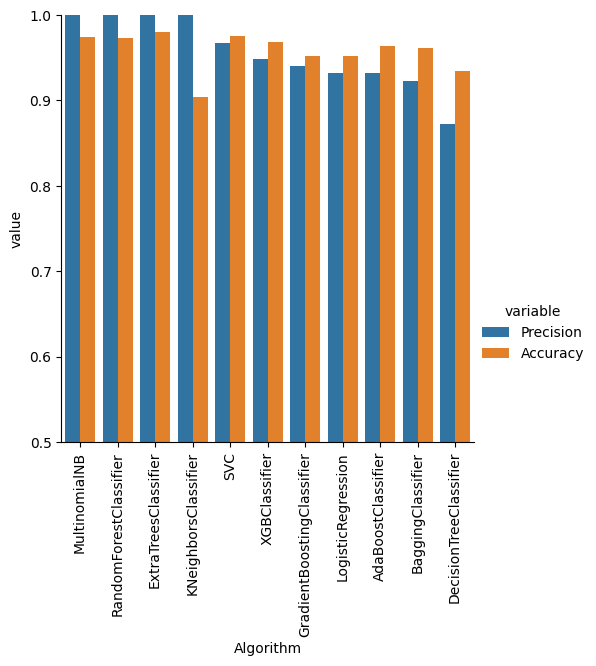

In [162]:
sns.catplot(x = 'Algorithm', y='value', hue='variable',
            data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [163]:
# Votting Classifier, multiple models together
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)

In [164]:
voting = VotingClassifier(estimators=[('svc', svc), ('nb', mnb), ('et', etc)], voting='soft')


In [165]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [166]:
y_pred = voting.predict(X_cv)
print(accuracy_score(y_cv, y_pred))
#print(confusion_matrix(y_cv, y_pred))
print(precision_score(y_cv, y_pred))

0.9796905222437138
0.9834710743801653


In [167]:
#Applying Stacking
from sklearn.ensemble import StackingClassifier

In [168]:
# estimators=[('svc', svc), ('nb', mnb), ('et', etc)]
# stc = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())

In [169]:
# stc.fit(X_train, y_train)

In [170]:
# y_pred = stc.predict(X_cv)
# print(accuracy_score(y_cv, y_pred))
# #print(confusion_matrix(y_cv, y_pred))
# print(precision_score(y_cv, y_pred))

In [171]:
import pickle 

In [172]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [173]:
# pickle.dump(transform_text, open('transform_text.pkl', 'wb'))